# Histograms
Remember histogram on Nex-5. Same here.

## Histogram Calculation in OpenCV - cv2.calcHist()
cv2.calcHist([images], [channels], mask, [histSize], ranges)

    images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
    channels : it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.
    mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
    histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
    ranges : this is our RANGE. Normally, it is [0,256].

#### Here is an example of hist calculation with OpenCV and calculation & visualization with MatPlotLib:

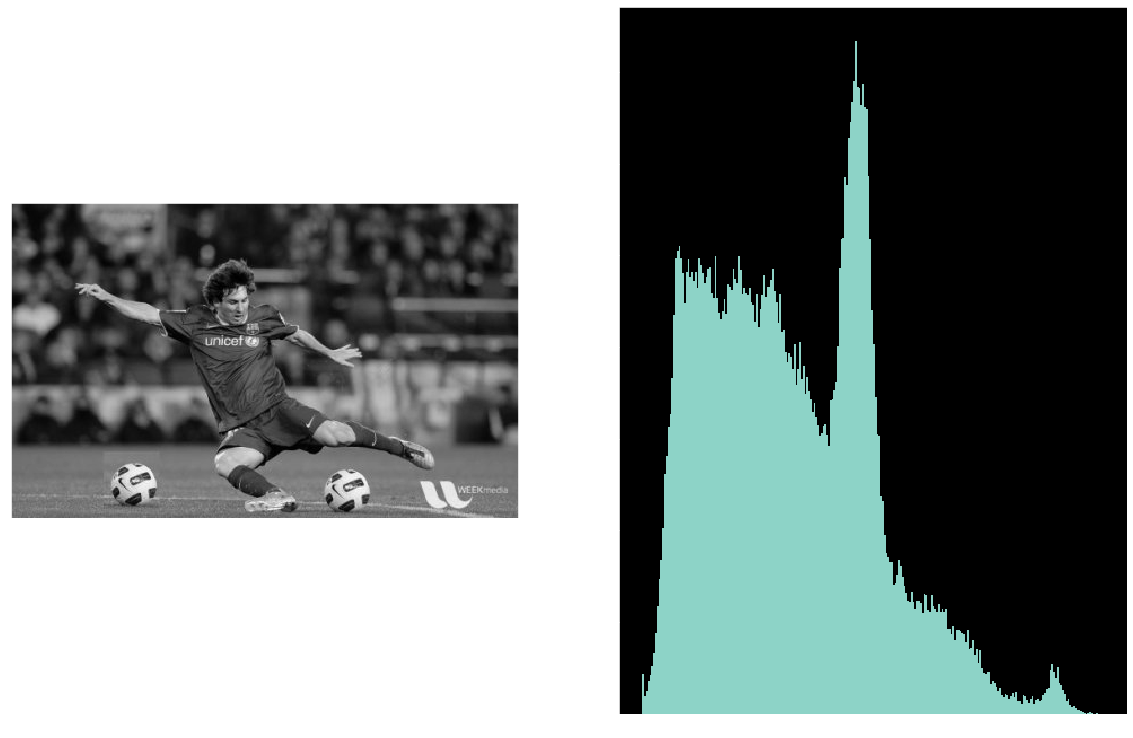

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 13))
plt.style.use('dark_background')

img = cv2.imread('messi5.jpg', 0)

# РАСЧЁТ гистограмы в OpenCV, без визуализации
# да, всё в квадратных скобках
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) 
# cv2.calcHist?


# visualization with matplotlib (without cv2.calcHist()!!!)
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # don`t show the x,y axes
plt.subplot(122), plt.hist(img.ravel(), 256, [0, 256]) # simple hist() call
plt.show();
# numpy.ravel() returns a contiguous flattened array

## Hist of the Masked Image

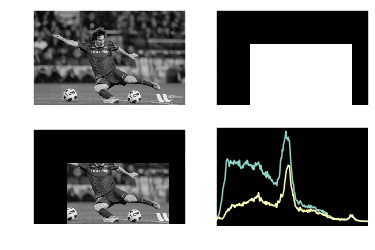

In [2]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

## Histogram Equalization - cv2.equalizeHist()
Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

Histogram equalization is good when histogram of the image is confined to a particular region. It won’t work good in places where there is large intensity variations where histogram covers a large region, ie both bright and dark pixels are present. Please check the SOF links in Additional Resources.

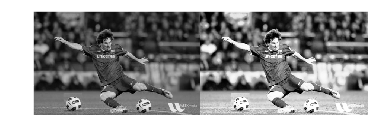

In [6]:
equ = cv2.equalizeHist(img)

#stacking images side-by-side
res = np.hstack((img,equ))

plt.imshow(res, 'gray')

## CLAHE (Contrast Limited Adaptive Histogram Equalization)
The first histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good idea (it`s bad if histogram is not confined to a particular region) and can lead to over/under-brightness.

So to solve this problem, adaptive histogram equalization is used. In this, image is divided into small blocks called “tiles” (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

Here is an example of CLAHE usage:

In [ ]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

## 2D Histogram in OpenCV
2D histogram is calculated using the same function, cv2.calcHist(). For color histograms, we need to convert the image from BGR to HSV. (Remember, for 1D histogram, we converted from BGR to Grayscale). For 2D histograms, its parameters will be modified as follows:

    channels = [0,1] because we need to process both H and S plane.
    bins = [180,256] 180 for H plane and 256 for S plane.
    range = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256.

Here is an example:

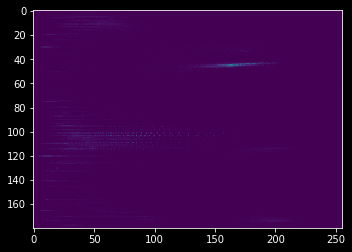

In [20]:
img = cv2.imread('messi5.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # colorspace conversion

# 2D histogram creation
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# use .imshow for visualization
plt.imshow(hist, interpolation = 'nearest'); # interpolation flag = nearest for better results

# x - Saturation, y - Hue
# to "read" this we have to know which color belongs to which Hue value

## Histogram Backprojection - cv2.calcBackProject()
Histogram Backprojection answers the question: “Where are the colors in the image that belong to the object being looked for (the target)?”

What is it? It is used for image segmentation or finding objects of interest in an image. In simple words, it creates an image of the same size (but single channel) as that of our input image, where each pixel corresponds to the probability of that pixel belonging to our object. In more simpler worlds, the output image will have our object of interest in more white compared to remaining part.

How do we do it ? We create a histogram of an image containing our object of interest (in our case, the ground, leaving player and other things). The object should fill the image as far as possible for better results. And a color histogram is preferred over grayscale histogram, because color of the object is more better way to define the object than its grayscale intensity. We then “back-project” this histogram over our test image where we need to find the object, ie in other words, we calculate the probability of every pixel belonging to the ground and show it. The resulting output on proper thresholding gives us the ground alone.

OpenCV provides an inbuilt function cv2.calcBackProject(). Its parameters are almost same as the cv2.calcHist() function. One of its parameter is histogram which is histogram of the object and we have to find it. Also, the object histogram should be normalized before passing on to the backproject function. It returns the probability image. Then we convolve the image with a disc kernel and apply threshold.


# Fourier Transformation
The Fourier Transform is an important image processing tool which is used to decompose an image into its sine and cosine components. The output of the transformation represents the image in the Fourier or frequency domain, while the input image is the spatial domain equivalent. In the Fourier domain image, each point represents a particular frequency contained in the spatial domain image.

The Fourier Transform is used in a wide range of applications, such as image analysis, image filtering, image reconstruction and image compression. 